In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Define grid and parameters
N = 128
h = 1.0 / (N - 1)
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

In [3]:
# Exact solution
u_exact = -(1 / (2 * np.pi**2)) * np.sin(np.pi * X) * np.sin(np.pi * Y)

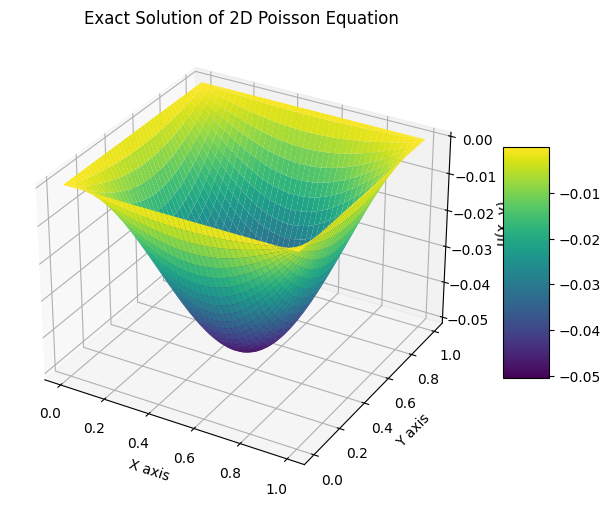

In [4]:
# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u_exact, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('u(x, y)')
ax.set_title('Exact Solution of 2D Poisson Equation')

# Colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

In [86]:
# Initialize right-hand side (rhs)
rhs = np.sin(np.pi * X) * np.sin(np.pi * Y) * h**2
norm_rhs = np.linalg.norm(rhs)
print(norm_rhs)

0.003937007874015749


In [100]:
# Initialize numerical solution and residual_norms array
u = np.zeros((N, N))
residual_norms = []

# Jacobi Iteration
itmax = 16000 # Computed using log(tolerance) / log(biggest_eigenvalue)
tolerance = 1e-4

for k in range(itmax):
    u_new = np.copy(u)
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            u_new[i, j] = 0.25 * (u_new[i + 1, j] + u_new[i - 1, j] + u_new[i, j + 1] + u_new[i, j - 1] - rhs[i, j])

    # Compute the residual and check for convergence
    residual = np.zeros((N,N))
    for i in range(1, N-1):
        for j in range(1,N-1):
            residual[i,j] = rhs[i,j] - (4 * u_new[i,j] - (u_new[i + 1, j] + u_new[i - 1, j] + u_new[i, j + 1] + u_new[i, j - 1]))
#     residual = rhs - (4 * u_new - np.roll(u_new, 1, axis=0) - np.roll(u_new, -1, axis=0) - np.roll(u_new, 1, axis=1) - np.roll(u_new, -1, axis=1))*h**2
    norm_residual = np.linalg.norm(residual)
    residual_norms.append(2-norm_residual / norm_rhs)
    if 2-norm_residual / norm_rhs < tolerance:
        print(f'Converged after {k} iterations. Relative residual error is {2-norm_residual / norm_rhs}.')
        break

    u = u_new
    if k == itmax - 1 or ((k+1) % 1000 == 0):
        print(f"Failed to converge after {k+1} iterations. Relative residual error is {2-norm_residual / norm_rhs}.")

Failed to converge after 1000 iterations. Relative residual error is 0.542328344856343.
Failed to converge after 2000 iterations. Relative residual error is 0.29411306988497476.
Failed to converge after 3000 iterations. Relative residual error is 0.15949725015368665.
Failed to converge after 4000 iterations. Relative residual error is 0.08649347668874152.
Failed to converge after 5000 iterations. Relative residual error is 0.046903887351920304.
Failed to converge after 6000 iterations. Relative residual error is 0.025435014590549754.
Failed to converge after 7000 iterations. Relative residual error is 0.013792849494641546.
Failed to converge after 8000 iterations. Relative residual error is 0.007479549406774977.
Failed to converge after 9000 iterations. Relative residual error is 0.004055987312539644.
Failed to converge after 10000 iterations. Relative residual error is 0.0021994677311858446.
Failed to converge after 11000 iterations. Relative residual error is 0.0011927200677244176.
F

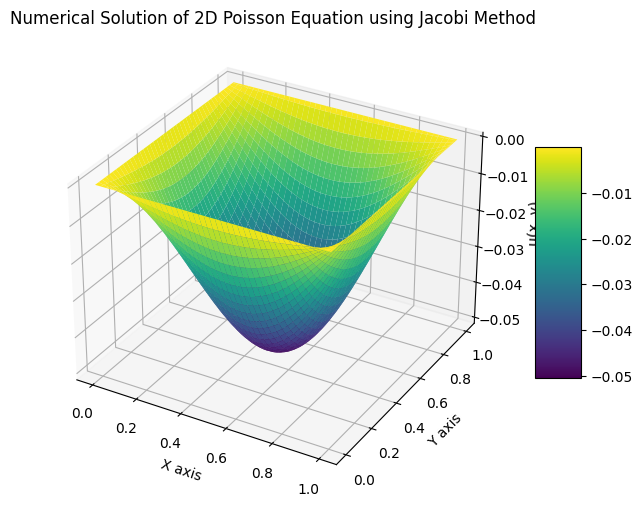

In [101]:
# Plotting the numerical solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('u(x, y)')
ax.set_title('Numerical Solution of 2D Poisson Equation using Jacobi Method')

# Colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

In [102]:
# Calculate the relative real error
relative_real_error = np.linalg.norm(u_exact - u) / np.linalg.norm(u_exact)
print(f'\n The relative real error is {relative_real_error:.5e} \n')


 The relative real error is 4.90512e-05 



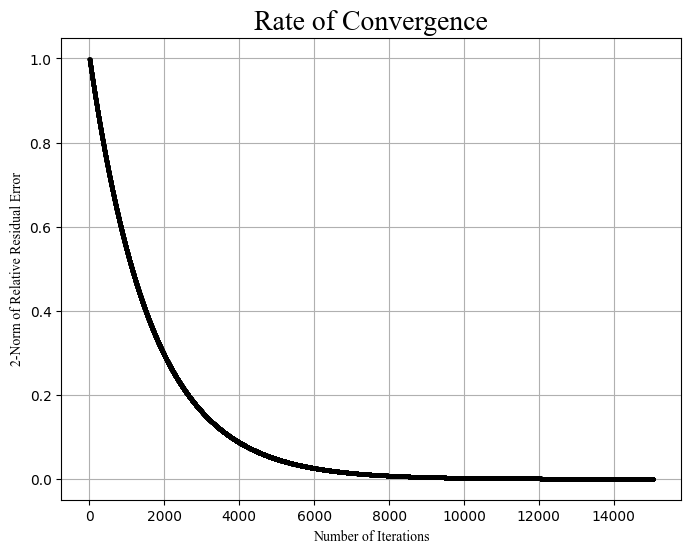

In [103]:
# Plotting the rate of convergence
plt.figure(figsize=(8, 6))
plt.plot(residual_norms, 'ko-', markersize=2, linewidth=0.5)
plt.xlabel('Number of Iterations', fontname='Times New Roman')
plt.ylabel('2-Norm of Relative Residual Error', fontname='Times New Roman')
plt.title('Rate of Convergence', fontname='Times New Roman', fontsize=20)
plt.grid(True)
plt.show()

In [105]:
estimated_iterations = 0.5*np.log(tolerance) / np.log(np.cos(np.pi*h))
print(f'\n Based on analysis, the required number of iterations is {estimated_iterations:.0f} \n')


 Based on analysis, the required number of iterations is 15050 

